In [44]:
import glob, os, json, re, unicodedata
from bs4 import BeautifulSoup

input_text = []
input_labels = []
labels = {"Barack Obama": 0,
          "Donald J. Trump": 1,
          "Dwight D. Eisenhower": 2,
          "Franklin D. Roosevelt": 3,
          "George Bush": 4,
          "George W. Bush": 5,
          "Gerald R. Ford": 6,
          "Harry S. Truman": 7,
          "Herbert Hoover": 8,
          "Jimmy Carter": 9,
          "John F. Kennedy": 10,
          "Lyndon B. Johnson": 11,
          "Richard Nixon": 12,
          "Ronald Reagan": 13,
          "William J. Clinton": 14}

# load raw text files straight in, no parsing
directory = "../data/processed/"
file_to_label = {"Obama": "Barack Obama", "Trump": "Donald J. Trump"}
for filename in glob.glob(os.path.join(directory, '*.txt')):
    arr = filename.replace(directory,'').split("_")
    input_labels = input_labels + [labels[file_to_label[arr[0]]]]
    raw = open(filename).read().decode("UTF-8").encode("ascii","ignore")
    input_text = input_text + [raw] 
        
# load JSON text files; parsing into raw text
directory = "../data/unprocessed/"
for filename in glob.glob(os.path.join(directory, '*.json')):
        json_data=open(filename)
        data = json.load(json_data)
        json_data.close()
        for data2 in data["speeches"]:
            # data2['text'] has a lot of htmtl tags in there. We still need to parse it            
            raw = BeautifulSoup(data2['text'], "html.parser").get_text()
            raw = unicodedata.normalize('NFKD', raw).encode('ascii','ignore')
            # Remove []
            raw = re.sub(' \[.*?\]',' ', raw, flags=re.DOTALL)
            # Remove ()
            raw = re.sub(' \(.*?\)',' ', raw, flags=re.DOTALL)
            if (attrName == 'speeches' and 'News Conference With' not in data2['name']):
                # Cleaning up the data: eemoving the questions
                raw = re.sub('[A-Z,\s,\.]Q\..*? The President\.','\.',raw, flags=re.DOTALL)
                raw = re.sub('^[A-Z,\s]*THE PRESIDENT\.','',raw, flags=re.DOTALL)
                raw = re.sub('[A-Z,\s,\.]Q\..*?THE PRESIDENT\.','\.',raw, flags=re.DOTALL)
            speaker = data2['speaker']
            input_labels = input_labels + [labels[speaker]] 
            input_text = input_text + [raw]

tokenizer = Tokenizer(num_words=1000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True, split=" ", char_level=False)
tokenizer.fit_on_texts(input_text)
tk_test = tokenizer.texts_to_sequences(input_text)


In [49]:
from sklearn.cross_validation import train_test_split

X = sequence.pad_sequences(tk_test, maxlen=max_len)
y = to_categorical(input_labels)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=0)

In [51]:
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, SimpleRNN, Dropout

max_len = 2000
max_features = 20000

model = Sequential()
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 100, input_length=max_len))
model.add(Dropout(0.2))
model.add(SimpleRNN(100))
model.add(Dense(15))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adagrad',metrics=['categorical_accuracy'])
print(model.summary())

model.fit(train_X, y=train_y, batch_size=50, nb_epoch=10, verbose=1)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 2000, 100)         2000000   
_________________________________________________________________
dropout_8 (Dropout)          (None, 2000, 100)         0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 15)                1515      
_________________________________________________________________
activation_8 (Activation)    (None, 15)                0         
Total params: 2,021,615
Trainable params: 2,021,615
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1827/1827 [==============================] - 34s - loss: 2.6012 - categorical_accuracy: 0.1341    
Ep

In [82]:
import numpy as np

# Evaluate performance
print "Evaluating test data..."
loss_and_metrics = model.evaluate(test_X, test_y)

# Make some predictions
print "\nPredicting using test data..."
pred_y = model.predict(test_X, batch_size=100)
pred_y_collapsed = np.argmax(pred_y, axis=1)
test_y_collapsed = np.argmax(test_y, axis=1)

#print pred_y_collapsed, test_y_collapsed

print model.metrics_names
print loss_and_metrics

Evaluating test data...
457/457 [==============================] - 2s     

Predicting using test data...
['loss', 'categorical_accuracy']
[2.3564531349248905, 0.23632385123610758]


Confusion matrix, without normalization
[[33  0  0  0  0  0  0 38  0  0  0  0  0  0  0]
 [ 5  2  0  0  0  0  0  2  3  0  0  0  0  0  0]
 [10  0  0  0  0  0  0 15  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0 43  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0 16  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 73  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  7  1  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  7  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0 21  0  0  0  0  0  0  0]]
Normalized confusion matrix
[[ 0.46  0.    0.    0.    0.    0.    0.    0.54  0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.42  0.17  0.    0.    0.    0.    0.    0.17  0.25  0.    0.    0.    0.
   0.    0.  ]
 [ 0.4   0.    0.    0.  

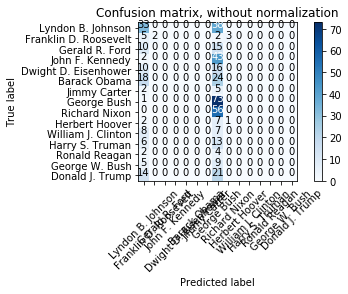

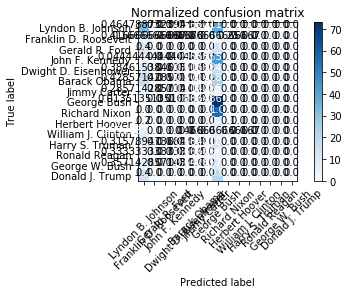

In [81]:
# from scikit-learn examples @
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y_collapsed, pred_y_collapsed)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels.keys(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels.keys(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()